## 1. Importing necessary libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 2. Loading the Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


## 3. Data Preprocessing

### 3.a. Checking of duplicates

In [5]:
print('No. of Duplicate rows in train:', sum(train.duplicated()))
print('No. of Duplicate rows in test:', sum(test.duplicated()))

No. of Duplicate rows in train: 0
No. of Duplicate rows in test: 0


### 3.b. Checking for missing values

In [6]:
print('No of missing values in train :', train.isna().values.sum())
print('No of missing values in test :', test.isna().values.sum())

No of missing values in train : 0
No of missing values in test : 0


### 3.c. Checking for class imbalance

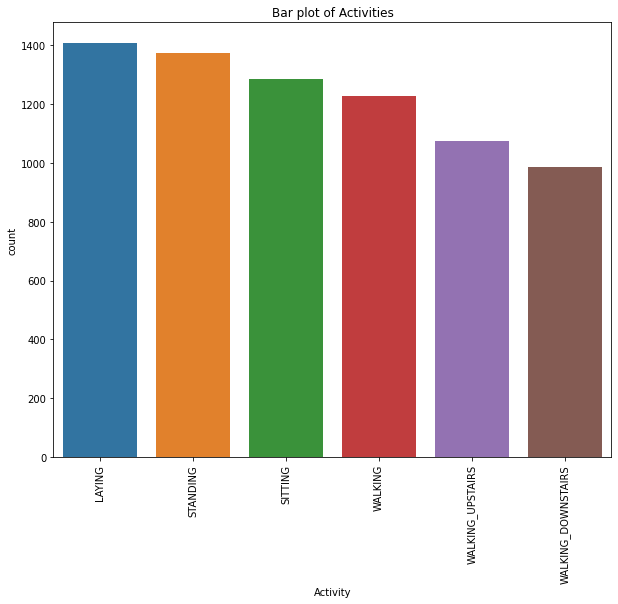

In [7]:
plt.figure(figsize = (10,8))
plt.title('Bar plot of Activities')
sns.countplot(x = train['Activity'], order = train.Activity.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

## 4. Exploratory Data Analysis

In [8]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [9]:
columns = []
for col in train.columns:
    columns.append(col.split('-')[0].split('(')[0])
columns = pd.DataFrame(columns)
columns[0].value_counts()

fBodyAcc                79
fBodyGyro               79
fBodyAccJerk            79
tGravityAcc             40
tBodyAcc                40
tBodyGyroJerk           40
tBodyGyro               40
tBodyAccJerk            40
tBodyAccMag             13
tGravityAccMag          13
tBodyAccJerkMag         13
tBodyGyroMag            13
tBodyGyroJerkMag        13
fBodyAccMag             13
fBodyBodyAccJerkMag     13
fBodyBodyGyroMag        13
fBodyBodyGyroJerkMag    13
angle                    7
subject                  1
Activity                 1
Name: 0, dtype: int64

### 4.a. Analysing Acceleration relationship with body activity

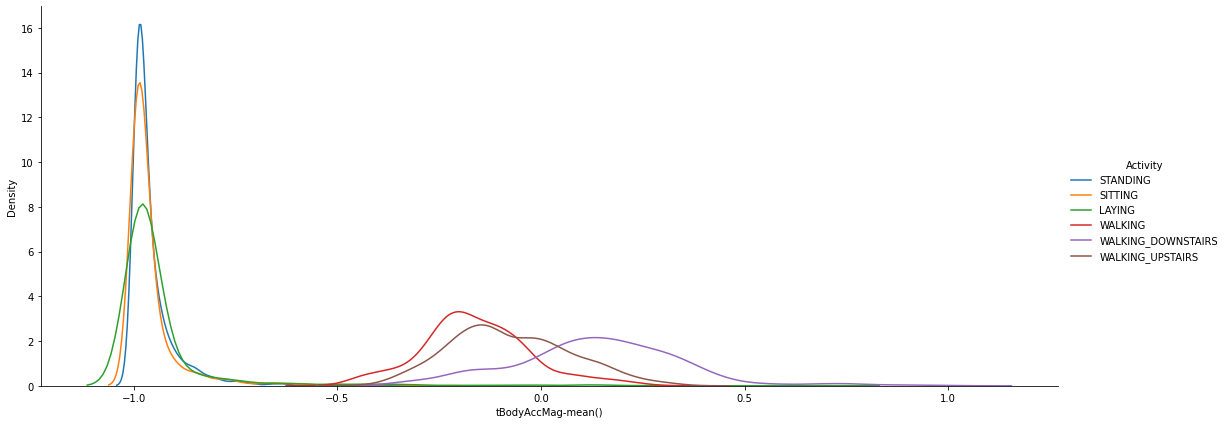

In [10]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 6, aspect = 2.5)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

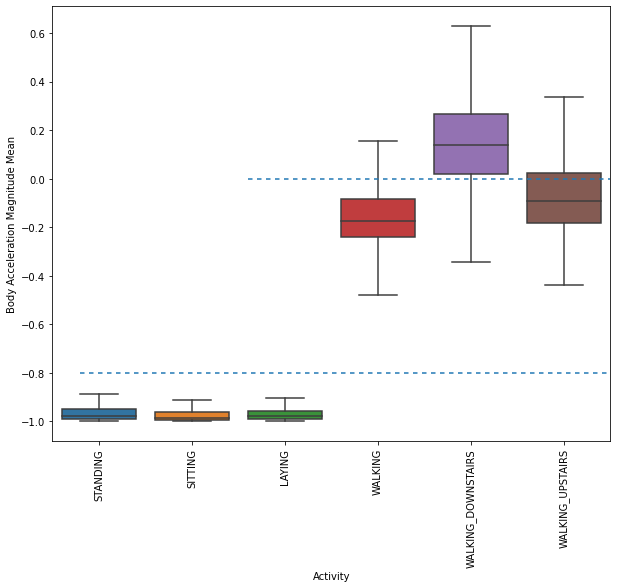

In [17]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Activity', y = 'tBodyAccMag-mean()', data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y = 0.0, xmin = 0.35, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

### 4.b. Analysing relationship between X-axis and gravityMean Feature

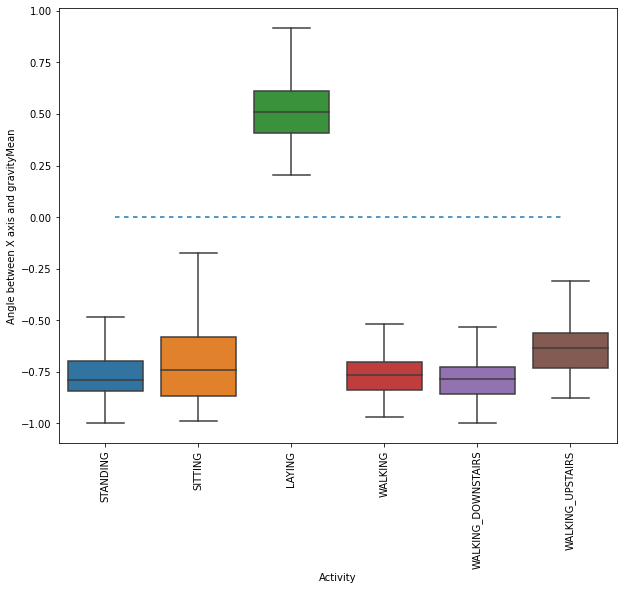

In [20]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Activity', y = 'angle(X,gravityMean)', data = train, showfliers = False)
plt.ylabel('Angle between X axis and gravityMean')
plt.axhline(y = 0.0, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

### 4.c. Analyzing relationship between Y-axis and gravityMean feature

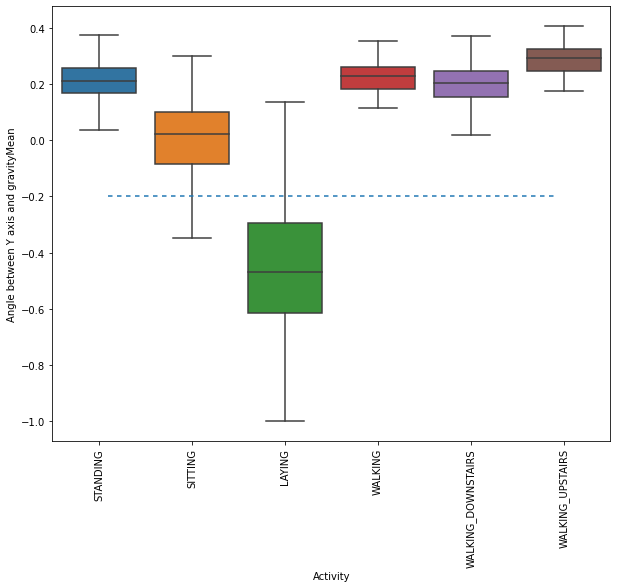

In [26]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Activity', y = 'angle(Y,gravityMean)', data = train, showfliers = False)
plt.ylabel('Angle between Y axis and gravityMean')
plt.axhline(y = -0.2, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

### 4.d. Analyzing the relationship between Z-axis and gravityMean feature|

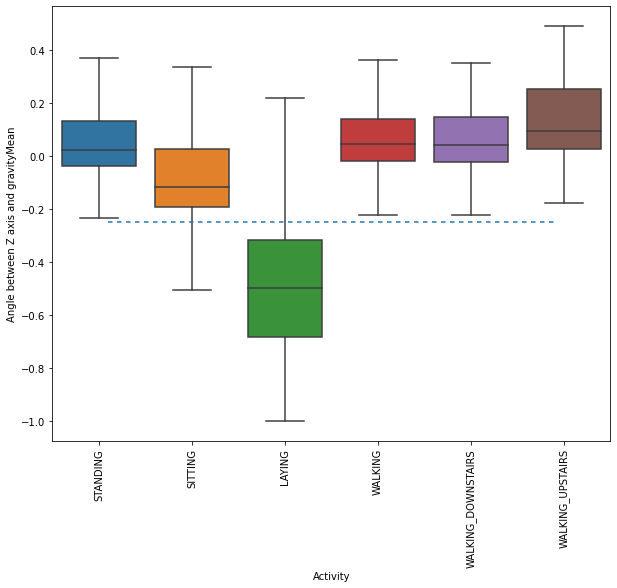

In [30]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Activity', y = 'angle(Z,gravityMean)', data = train, showfliers = False)
plt.ylabel('Angle between Z axis and gravityMean')
plt.axhline(y = -0.25, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

### 4.e. Analyzing relationship of entropy with body activities

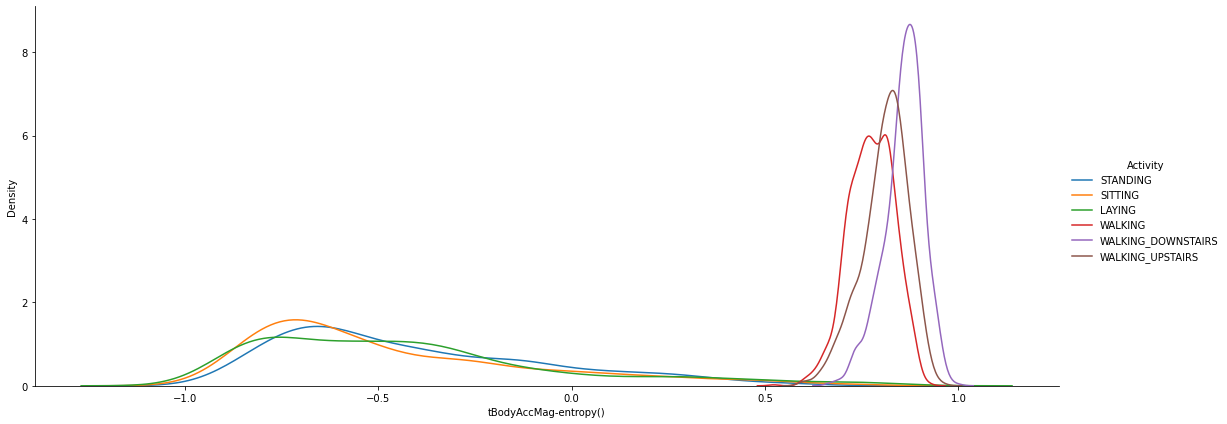

In [36]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 6, aspect = 2.5)
facetgrid.map(sns.distplot, 'tBodyAccMag-entropy()', hist = False).add_legend()

### 4.f. Visualizing data with PCA

Data can be visualized from high dimensional space to a low dimensional space using PCA. Given data has 561 features, which is impossible to visualize, so visualizing the data in a 2-Dimensional space using PCA

In [44]:
x_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components = 2, random_state = 0).fit_transform(x_pca)


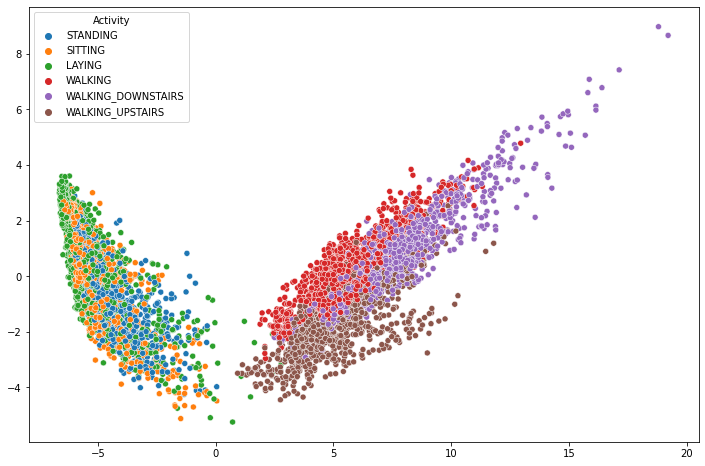

In [50]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

### 4.g. Visualizing data with tSNE

Data can be visualized from high dimensional space to a low dimensional space using tSNE. Given data has 561 features, which is impossible to visualize, so visualizing the data in a 2-Dimensional space using tSNE

In [52]:
x_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 1000).fit_transform(x_tsne)
tsne

array([[ 63.4906   , -39.7206   ],
       [ 13.5708065, -39.372986 ],
       [ 16.88333  , -37.352337 ],
       ...,
       [ 60.73749  ,  14.081628 ],
       [ 60.48153  ,  14.081899 ],
       [ 59.754375 ,  14.62647  ]], dtype=float32)

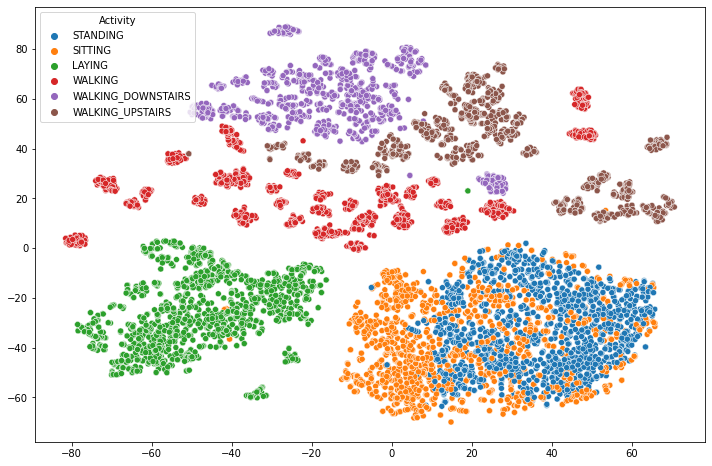

In [53]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

## 5. ML Model

### 5.a. Getting training and testing data ready 

In [55]:
x_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train['Activity']

x_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

### 5.b. Logistic regression model with hyperparameter tuning and cross validation

#### Using RandomSearchCV

In [58]:
lr = LogisticRegression()
param = {'max_iter':[100, 200, 500],
        'solver':['lbfgs', 'saga']}
lr_rs = RandomizedSearchCV(lr, param_distributions = param, cv = 5)
lr_rs.fit(x_train, y_train)
y_pred = lr_rs.predict(x_test)

In [59]:
lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using RandomizedSearchCV:', lr_accuracy)

Accuracy using RandomizedSearchCV: 0.954954954954955


<Figure size 864x576 with 0 Axes>

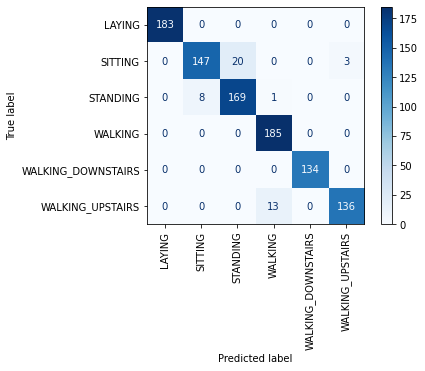

In [76]:
plt.figure(figsize = (12,8))
cm = confusion_matrix(y_test, y_pred, labels=lr_rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_rs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [77]:
print('Best Parameters:', lr_rs.best_params_)

Best Parameters: {'solver': 'saga', 'max_iter': 500}


#### Using GridSearchCV

In [82]:
lr_gs = GridSearchCV(lr, param_grid = param, cv = 5)
lr_gs.fit(x_train, y_train)
y_pred_gs = lr_gs.predict(x_test)


In [83]:
lr_gs_accuracy = accuracy_score(y_test, y_pred_gs)
print('Accuracy using GridSearchCV:', lr_gs_accuracy)

Accuracy using GridSearchCV: 0.954954954954955


<Figure size 864x576 with 0 Axes>

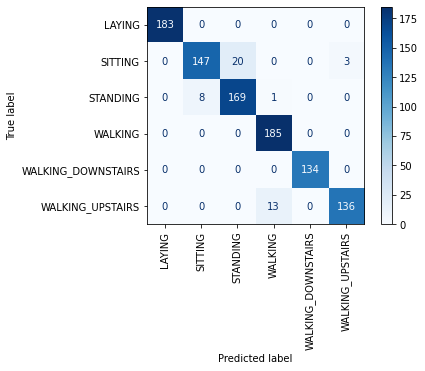

In [84]:
plt.figure(figsize = (12,8))
cm = confusion_matrix(y_test, y_pred_gs, labels=lr_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_gs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [85]:
print('Best Parameters:', lr_gs.best_params_)

Best Parameters: {'max_iter': 500, 'solver': 'saga'}


### 5.c. SVM Model with Hyperparameter tuning and cross validation

#### Using RandomizedSearchCV

In [86]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [20, 50, 100]
}
svm_rs = RandomizedSearchCV(SVC(), param_distributions = parameters, cv = 3, random_state = 42)
svm_rs.fit(x_train, y_train)
y_pred_rs = svm_rs.predict(x_test)

In [94]:
svm_rs_accuracy = accuracy_score(y_test, y_pred_rs)
print('Accuracy using RandomizedSearchCV:', svm_rs_accuracy)

Accuracy using RandomizedSearchCV: 0.965965965965966


<Figure size 864x576 with 0 Axes>

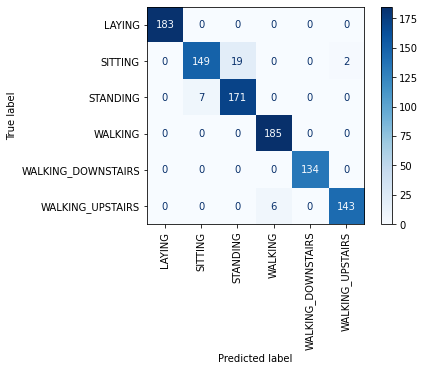

In [88]:
plt.figure(figsize = (12,8))
cm = confusion_matrix(y_test, y_pred_rs, labels=svm_rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [89]:
print('Best Parameters:', svm_rs.best_params_)

Best Parameters: {'kernel': 'rbf', 'C': 50}


#### Using GridSearchCV

In [93]:
svm_gs = GridSearchCV(SVC(), param_grid = parameters, cv = 3)
svm_gs.fit(x_train, y_train)
y_pred_gs = svm_gs.predict(x_test)

In [95]:
svm_gs_accuracy = accuracy_score(y_test, y_pred_gs)
print('Accuracy using GridSearchCV:', svm_gs_accuracy)

Accuracy using GridSearchCV: 0.965965965965966


<Figure size 864x576 with 0 Axes>

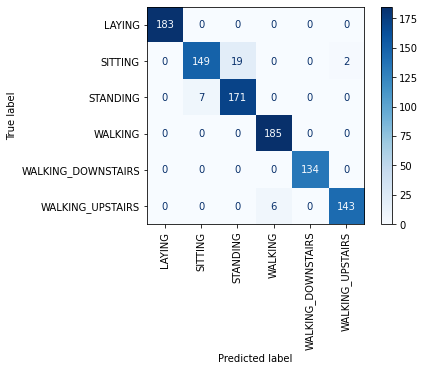

In [96]:
plt.figure(figsize = (12,8))
cm = confusion_matrix(y_test, y_pred_gs, labels=svm_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_gs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [97]:
print('Best Parameters:', svm_gs.best_params_)

Best Parameters: {'C': 50, 'kernel': 'rbf'}


### 5.d. Desicion tree model with hyperparameter tuning and cross validation 

#### Using RandomizedSearchCV 

In [98]:
param = {'max_depth': np.arange(2, 20, 2)}
dt_rs = RandomizedSearchCV(DecisionTreeClassifier(), param, cv = 5, random_state = 42)
dt_rs.fit(x_train, y_train)
y_pred = dt_rs.predict(x_test)

In [99]:
dt_rs_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', dt_rs_accuracy)

Accuracy : 0.8508508508508509


<Figure size 864x576 with 0 Axes>

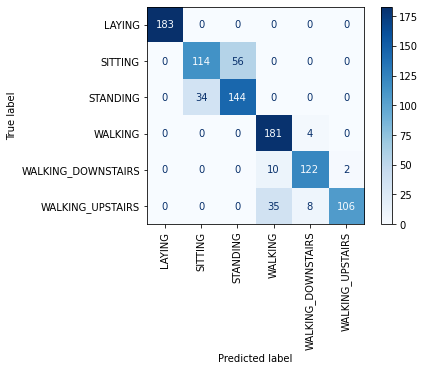

In [100]:
plt.figure(figsize = (12,8))
cm = confusion_matrix(y_test, y_pred, labels=dt_rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_rs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [101]:
print('Best Parameters:', dt_rs.best_params_)

Best Parameters: {'max_depth': 10}


### 5.e. Random forest model with hyperparameter tuning and cross validation

#### Using GridSearchCV

In [105]:
param = {
    'n_estimators' : np.arange(10, 100, 10),
    'max_depth' : np.arange(2, 20, 2)
}

rf_gs = GridSearchCV(RandomForestClassifier(), param, cv = 5)
rf_gs.fit(x_train, y_train)
y_pred = rf_gs.predict(x_test)

In [106]:
rf_gs_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', rf_gs_accuracy)

Accuracy : 0.91991991991992


<Figure size 864x576 with 0 Axes>

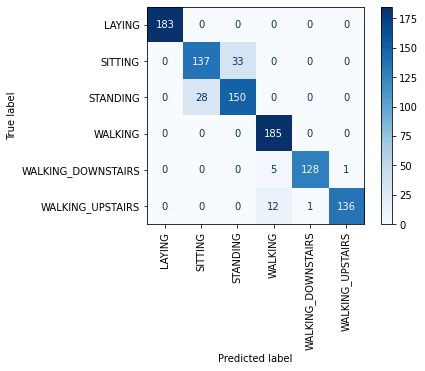

In [107]:
plt.figure(figsize = (12,8))
cm = confusion_matrix(y_test, y_pred, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_gs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [108]:
print('Best Parameters:', rf_gs.best_params_)

Best Parameters: {'max_depth': 16, 'n_estimators': 80}
